# Election Polls and Donation Analysis

This project focuses on the 2012 general election polls and donations data between Obama and Romney.  The data came from [kaggle.com](https://www.kaggle.com/kadser/2012-election-obama-vs-romney?select=2012-general-election-romney-vs-obama.csv)  The original source of the data is Huffington Pollster, which has a collection of polls from various agencies and organizations on many sociopolitical topics.

### Preliminaries

In this section we will import modules that will be used for the analysis.  The data can be downloaded from kaggle.com as .csv files.  I saved them in the same directory as this notebook.

In [1]:
# For data processing
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# Set poll data as pandas DataFrame
poll_df = pd.read_csv('2012-general-election-romney-vs-obama.csv')

# Let's get a glimpse at the data
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                590 non-null    object 
 1   Start Date              590 non-null    object 
 2   End Date                590 non-null    object 
 3   Entry Date/Time (ET)    590 non-null    object 
 4   Number of Observations  568 non-null    float64
 5   Population              590 non-null    object 
 6   Mode                    590 non-null    object 
 7   Obama                   590 non-null    float64
 8   Romney                  590 non-null    float64
 9   Undecided               423 non-null    float64
 10  Other                   202 non-null    float64
 11  Pollster URL            590 non-null    object 
 12  Source URL              588 non-null    object 
 13  Partisan                590 non-null    object 
 14  Affiliation             590 non-null    ob

In [3]:
# Let's get a glimpse at the data
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


The poll data set contains general election poll data from 590 pollsters.  It has several interesting data fields, such as **Population**, **Partisan**, **Affiliation**, ... etc.  We will take a closer look at some of these data fields.

### Affiliations

Let's take a look at the pollsters' party affiliation.

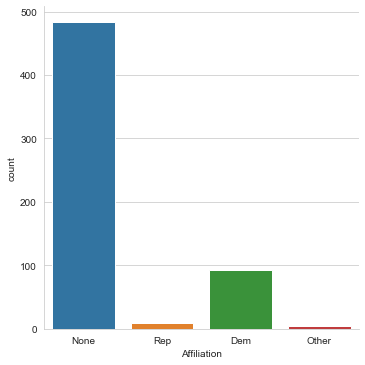

In [4]:
sns.catplot(data=poll_df, x='Affiliation', kind='count')

The graph tells us that majority of the pollsters have no party affiliation.  However, there is a huge imbalance between the number of pollsters that are affiliated with the Democrat and the Republican.  This imbalance could affect the interpretation of the later analysis.

Let's disect a little deeper and take a look at the population data field within each affiliation.

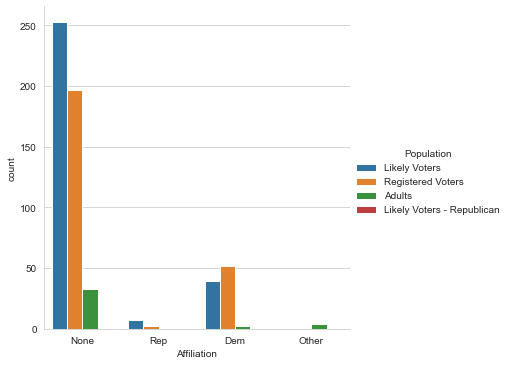

In [5]:
sns.catplot(data=poll_df, x='Affiliation', kind='count', hue='Population')

There are four unique types of population: *Likely Voters*, *Registered Voters*, *Adults*, and *Likely Voters - Republican*.  Kaggle.com did not offer more explanation on what each type of population mean.  The graph above shows the breakdown of population within each affiliation.

### Summarized Poll Results

Let's take a look at the overal poll results amongst **Obama**,  **Romney**, **Undecided**, and **Other**.  We will take an average across all pollsters and calculate a standard deviation for each candidate.

In [6]:
# Average poll results
avg = pd.DataFrame(poll_df.mean())
avg.drop(['Number of Observations', 'Question Text', 'Question Iteration'], inplace=True)
avg.head()

,0
Obama,46.774576
Romney,44.572881
Undecided,6.546099
Other,3.400990


In [7]:
# Standard deviation of the averaged poll results
std = pd.DataFrame(poll_df.std())
std.drop(['Number of Observations', 'Question Text', 'Question Iteration'], inplace=True)
std.head()

,0
Obama,2.447069
Romney,2.925320
Undecided,3.698614
Other,2.721318


<AxesSubplot:>

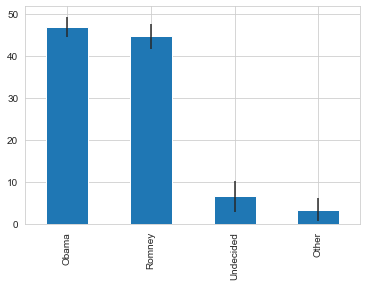

In [8]:
# Bar chart with error bars
# Note that we can applied the standard deviation to the yerr parameter for the plot.
avg.plot(kind='bar', yerr=std, legend=False)

We can see that Romney trails slightly behind Obama but is within the error margin.  There is a decent amount of undecided voters that could change the outcome of the election result.

Instead of a graph, we can also present this information as a summary table.

In [9]:
poll_avg = pd.concat([avg, std], axis=1)
poll_avg.columns = ['Average (%)', 'Margin of Error (%)']
poll_avg.head()

,Average (%),Margin of Error (%)
Obama,46.774576,2.447069
Romney,44.572881,2.925320
Undecided,6.546099,3.698614
Other,3.400990,2.721318


### Sentiment Analysis

Let's now turn our attention to some time series analysis on the population sentiments toward each candidate.

One of the data fields in the data set is **End Date**.  

In [10]:
poll_df['End Date'].min()

'2009-03-15'

In [11]:
poll_df['End Date'].max()

'2012-11-05'

The first poll was taken on March 15, 2009.  The last poll was take on November 5, 2012.  Let's plot a graph to show how the support for each candidate varies during these 3.5 years.

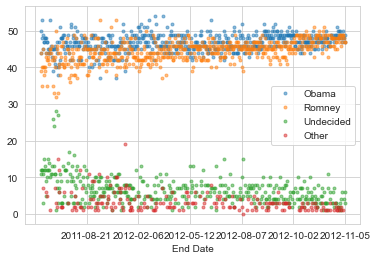

In [12]:
# Note in the line of code below a .invert_xaxis() method is called to
# ensure that the timeline (x-axis) is plotting with the earliest date
# on the left extending to a later date on the right.
poll_df.plot(x='End Date', y=['Obama', 'Romney', 'Undecided', 'Other'], 
             linestyle='', marker='.', alpha=0.5).invert_xaxis()

As shown above, we can see that support for Romney gradually catches up to that for Obama and that there is a slight decline in both the Undecided and the Other groups.  However, we do know that there is a lot more Democrats affiliated pollsters than Republican.  Let's redo this graph again but this time only keep pollsters that have no party affiliations and pollster that are affiliated with Democrats.

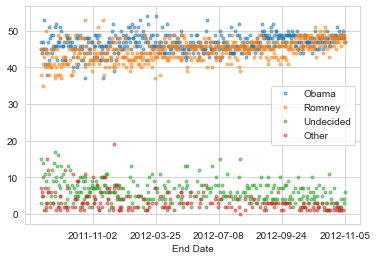

In [13]:
poll_df[poll_df['Affiliation'] == 'None'].plot(x='End Date',
                                               y=['Obama', 'Romney', 'Undecided', 'Other'],
                                               linestyle='',
                                               marker='.',
                                               alpha=0.5).invert_xaxis()

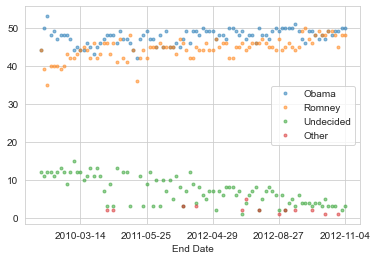

In [14]:
poll_df[poll_df['Affiliation'] == 'Dem'].plot(x='End Date',
                                               y=['Obama', 'Romney', 'Undecided', 'Other'],
                                               linestyle='',
                                               marker='.',
                                               alpha=0.5).invert_xaxis()

We observed similar trend lines with pollsters that have no party affiliations and with pollster that are affiliated with Democrats.

We can zoom in a bit closer to the variation of sentiment toward to the two major candidates by plotting a time series of *difference* between the support for Obama and Romney.  To do so, let's first create another column containing the difference between support for Obama and for Romney.  We will then group the dataframe by the polls' start dates and take an average of those polls.  Then we will plot the averaged difference vs. time.

In [15]:
# Calculate the difference between the supports.
poll_df['Difference'] = poll_df['Obama'] - poll_df['Romney']

# Group the dataframe by start dates and calculate the average.
sentiment_df = poll_df.groupby('Start Date', as_index=False).mean()

# Remove irrelevant columns.
sentiment_df.drop(columns=['Number of Observations',
                           'Question Text',
                           'Question Iteration',
                           'Undecided',
                           'Other'],
                  inplace=True)

# Let's take a look at this new dataframe.
sentiment_df.head()

,Start Date,Obama,Romney,Difference
0,2009-03-13,44.0,44.0,0.0
1,2009-04-17,50.0,39.0,11.0
2,2009-05-14,53.0,35.0,18.0
3,2009-06-12,48.0,40.0,8.0
4,2009-07-15,49.0,40.0,9.0


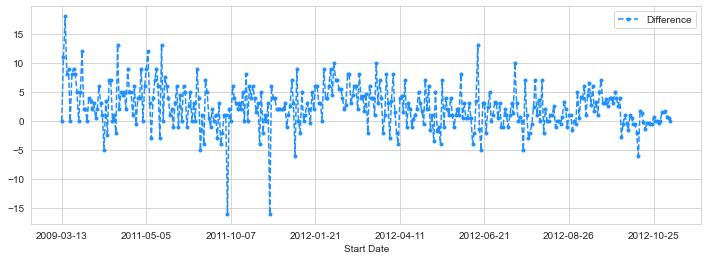

In [16]:
# Let's plot this difference.  Remember, it's in percent.
sentiment_df.plot(x='Start Date', y='Difference',
                  linestyle='--', marker='.', color='dodgerblue',
                  figsize=(12,4))
plt.show()

We can observe from the graph above that Obama leads Romney early on but the lead slowly dwindles down to 0.  Also interesting are the two negative spikes (Romney leading Obama) around October and November of 2011.  Perhaps there were some events that took place during that time frame that really favored Romney.

We know that the three presidential debates took place in the month of October of 2012.  Let's zoom in to that time frame and see if the outcome of the debates change the population sentiment toward each candidates.

In [17]:
# To find all polls in the month of October of 2012, we need to look at the Start Date column 
# and look for entries that starts with '2012-10'.   We will also use a row index counter to
# keep track of which index points to a date in October of 2012.

# Index starts at 0 for Python.
row_index = 0

# Initialize a tracker list to keep track of the indices in Oct, 2012.
oct_index = []

for date in sentiment_df['Start Date']:
    if date[:7] == '2012-10':
        oct_index.append(row_index)
        row_index += 1
    else:
        row_index += 1
        
xlim=[min(oct_index), max(oct_index)]
xlim

[329, 356]

In the above snippet of code, we found the indices for the first and the last polls, which have a start date in Oct, 2012.  We can plot the Difference of the support in just the month of Oct, 2012, by specifying the xlim parameter in the plot function.

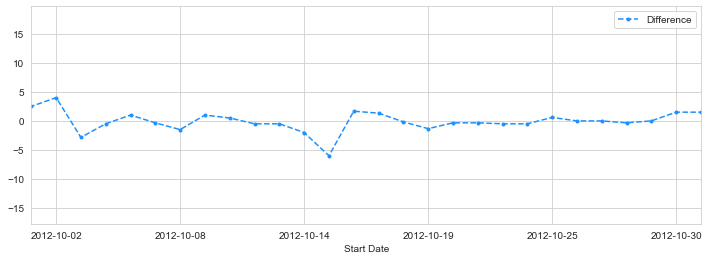

In [18]:
# Difference in the month of Oct, 2012.  Look at the xlim parameter.
sentiment_df.plot(x='Start Date', y='Difference', xlim=xlim,
                  linestyle='--', marker='.', color='dodgerblue',
                  figsize=(12,4))
plt.show()

The three dates for the presidential debate were:

* Oct 3, 2012
* Oct 11, 2012
* Oct 22, 2012

We can add a vertical line to the above graph at each date to see how the sentiment changed after the debates.  To add a vertical line, we use can use the `.axvline()` method.  Note that we don't have poll data for everyday for the month of Oct, 2012.  So we will have to approximately place these vertical lines.

There are 31 days in the October.  But we only have 28 indices (from 329 to 356).  Therefore each single increment in index is roughly 1.1 days (31/28).  For Oct 3, 2012, we will use index 331 (329 + 1.1 * 2).  For Oct 11, 2012, we will use index 340 (329 + 1.1 * 10).  For Oct 22, 2012, we will use index 352 (329 + 1.1 * 21).

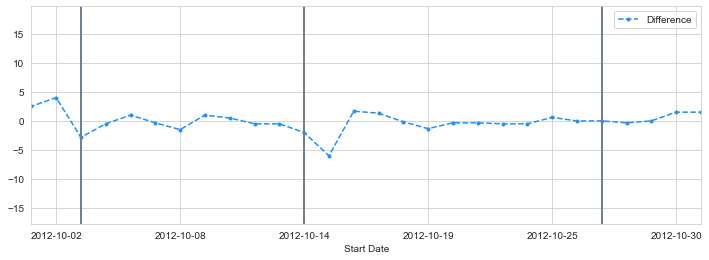

In [19]:
sentiment_df.plot(x='Start Date', y='Difference', xlim=xlim,
                  linestyle='--', marker='.', color='dodgerblue',
                  figsize=(12,4))
plt.axvline(x=331, linewidth=2, color='slategrey')
plt.axvline(x=340, linewidth=2, color='slategrey')
plt.axvline(x=352, linewidth=2, color='slategrey')
plt.show()

We know that Obama didn't do quite well during the first debate but better in the second and the third.  Our sentiment analysis didn't reflect such.  However, we also need to keep in mind of the demographics of the population and the geographic locations where the polls were taken.

### Donor Data Set

The donor data set can be retrieved from the same Kaggle link shown earlier.  The dataset is about 151 MB and consists of information on donations to the federal campaign.

The questions we will be answering are:
1. How much was donated and what was the average donation?
2. How did the donations differ between candidates?
3. How did the donations differ between Democrats and Republicans?
4. What are the demographics of donors?

In [20]:
donor_df = pd.read_csv('Election_Donor_Data.csv')

/Users/justinhsia/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

There are over 1 million data points to work with with 16 different data columns.  Let's take a look at a small slice of the dataframe.

In [22]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


Each entry consists of candidate information, donor information, contribution amount, contribution date, and some other overhead data.

Let's see what amount of donation is the most frequent.

In [23]:
donor_df['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
             ...  
 58.43           1
-2115.21         1
 75.64           1
 142.41          1
 35.83           1
Name: contb_receipt_amt, Length: 8079, dtype: int64

We see that the most common contribution amount is \\$100 followed by \\$50 and \\$25.  We also see there are some negative amounts.  According to Kaggle, the negative amounts are refunds back to the donors for whatever reasons.  Also note that there are a lot of single count donation amounts.  Those amounts are usually not a whole number, which does intuitively make sense.

Let's first remove all the negative contributions since the donations didn't go to the candidates and we are not interested in those data points.

In [24]:
donor_df = donor_df[donor_df['contb_receipt_amt'] > 0]

In [25]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991475 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cmte_id            991475 non-null  object 
 1   cand_id            991475 non-null  object 
 2   cand_nm            991475 non-null  object 
 3   contbr_nm          991475 non-null  object 
 4   contbr_city        991457 non-null  object 
 5   contbr_st          991471 non-null  object 
 6   contbr_zip         991373 non-null  object 
 7   contbr_employer    983833 non-null  object 
 8   contbr_occupation  989133 non-null  object 
 9   contb_receipt_amt  991475 non-null  float64
 10  contb_receipt_dt   991475 non-null  object 
 11  receipt_desc       5219 non-null    object 
 12  memo_cd            89461 non-null   object 
 13  memo_text          94274 non-null   object 
 14  form_tp            991475 non-null  object 
 15  file_num           991475 non-null  int64  
dtypes

We now have just shy of one million data entries.  Let's take a look again at the top 10 donation amounts.  Intuition tells us that they should all be nice whole numbers in 5's or 10's.

In [26]:
donor_df['contb_receipt_amt'].value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

Indeed, the top donation amounts range from \\$10 to \\$2500.  We can visualize this information in a histogram.  We can limit the top end of the x-axis (donation amount) to \\$2500.

<AxesSubplot:xlabel='contb_receipt_amt', ylabel='Count'>

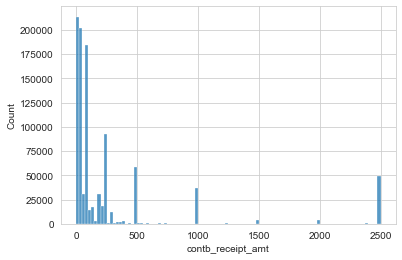

In [27]:
sns.histplot(data=donor_df[donor_df['contb_receipt_amt'] <= 2500],
             x='contb_receipt_amt',
             bins=100)

We see several peaks at nice whole numbers.  There are counts at \\$1500, \\$2000, and even \\$1250.

### Questions

##### 1. How much was the donation and what was the average?

In [28]:
total = donor_df['contb_receipt_amt'].sum()
avg = donor_df['contb_receipt_amt'].mean()
std = donor_df['contb_receipt_amt'].std()

print('Total amount donated was $%.2f.  Average amount was $%.2f with a standard'
       'deviation of $%.2f.' %(total, avg, std))

Total amount donated was $309531353.24.  Average amount was $312.19 with a standarddeviation of $3764.48.


##### 2. How did the donations differ between candidates?

Let's first figure out who the candidates were by calling the `.unique()` method on the **cand_nm** column.

In [29]:
donor_df['cand_nm'].unique()

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [30]:
len(donor_df['cand_nm'].unique())

13

There are a total of 13 candidates.  All but one of them are Republicans.  The single Democrat is Barack Obama.

Let's now see how many contributions each candidate receives and what the total amount is for each candidate.  We can call the `groupby()` method on the dataframe with a groupby parameter of **cand_nm**.

In [31]:
contb_by_cand = donor_df.groupby('cand_nm')['contb_receipt_amt'].count()
amnt_by_cand = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

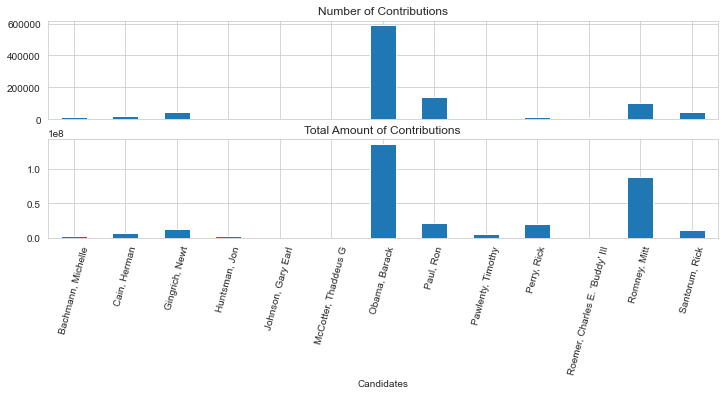

In [32]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12,4))
contb_by_cand.plot(ax=ax1, kind='bar')
amnt_by_cand.plot(ax=ax2, kind='bar')
ax1.set_title('Number of Contributions')
ax2.set_title('Total Amount of Contributions')
ax2.set_xlabel('Candidates')
plt.xticks(rotation=75)
plt.show()

It is not a surprise that Barack Obama received the most number of donations with the highest total amount.  In the Republican camp, Ron Paul received the most number of donations but it was Mitt Romney that rivaled Obama in terms of the highest dollar amount.

##### 3. How did the donations differ between Democrats and Republicans?

In order to answer this question, we first have to create a party affiliation column for each data entry.  The quickest way to accomplish this is by calling the `.map()` method with a dictionary containing party affiliation for each candidate. 

In [33]:
# Let's first get a list of candidates.
cand = donor_df['cand_nm'].unique()
cand

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [34]:
# Now let's create a list of party affiliation corresponding to each candidate.
# We notice that there are 12 Republican candidates and one Democratic candidate.
# We first create a list of 12 elements with each element being 'Republican'.
# We then use the .insert() method to insert a 'Democratic' in the corresponding position
# where Obama is in the cand list created previously.
party = ['Republican'] * 12
party.insert(2, 'Democratic')
party

['Republican',
 'Republican',
 'Democratic',
 'Republican',
 'Republican',
 'Republican',
 'Republican',
 'Republican',
 'Republican',
 'Republican',
 'Republican',
 'Republican',
 'Republican']

In [35]:
# Now we use zip() and the dict() function to create the party affiliation dictionary.
party_aff = dict(zip(cand, party))
party_aff

{'Bachmann, Michelle': 'Republican',
 'Romney, Mitt': 'Republican',
 'Obama, Barack': 'Democratic',
 "Roemer, Charles E. 'Buddy' III": 'Republican',
 'Pawlenty, Timothy': 'Republican',
 'Johnson, Gary Earl': 'Republican',
 'Paul, Ron': 'Republican',
 'Santorum, Rick': 'Republican',
 'Cain, Herman': 'Republican',
 'Gingrich, Newt': 'Republican',
 'McCotter, Thaddeus G': 'Republican',
 'Huntsman, Jon': 'Republican',
 'Perry, Rick': 'Republican'}

With this **party_aff** dictionary ready, we can now *map* each donation entry to a party based on the candidate's party affiliation.

In [36]:
donor_df['party'] = donor_df['cand_nm'].map(party_aff)
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


Scroll the slice of dataframe all the way to the right, we see that we have successfully inserted a column named **party**.

We can now call the `.groupby()` method with that newly created **party** column to sum up all donations to each party.

<AxesSubplot:ylabel='contb_receipt_amt'>

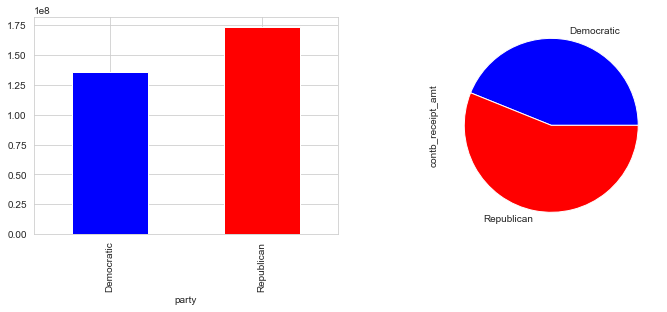

In [37]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
donor_df.groupby('party')['contb_receipt_amt'].sum().plot.bar(ax=ax1, color=['blue','red'])
donor_df.groupby('party')['contb_receipt_amt'].sum().plot.pie(ax=ax2, colors=['blue', 'red'])

Here we present the total amount of donations collected by the Democratic and the Republican parties in two ways: a bar chart and a pie chart.  The bar chart shows us the total amounts and the difference between the two.  The pie chart shows us a relative percentage of donations each party received.

##### 4. What are the demographics of donors?

One piece of demographic information we have on the donors are their states of residence.  Let's take a look to see how each states contribute to both parties.

To accomplish this, we will build a pivot table with **contbr_st** as the index and **party** as the column.  We will aggregate on **contb_receipt_amt** using the `sum` function.

In [38]:
state_df = donor_df.pivot_table(values='contb_receipt_amt',
                                index='contbr_st',
                                columns='party',
                                aggfunc='sum')
state_df.shape

(73, 2)

We see that there are actually 73 different state abbreviations.  Let's construct a horizontal bar chart to show them.

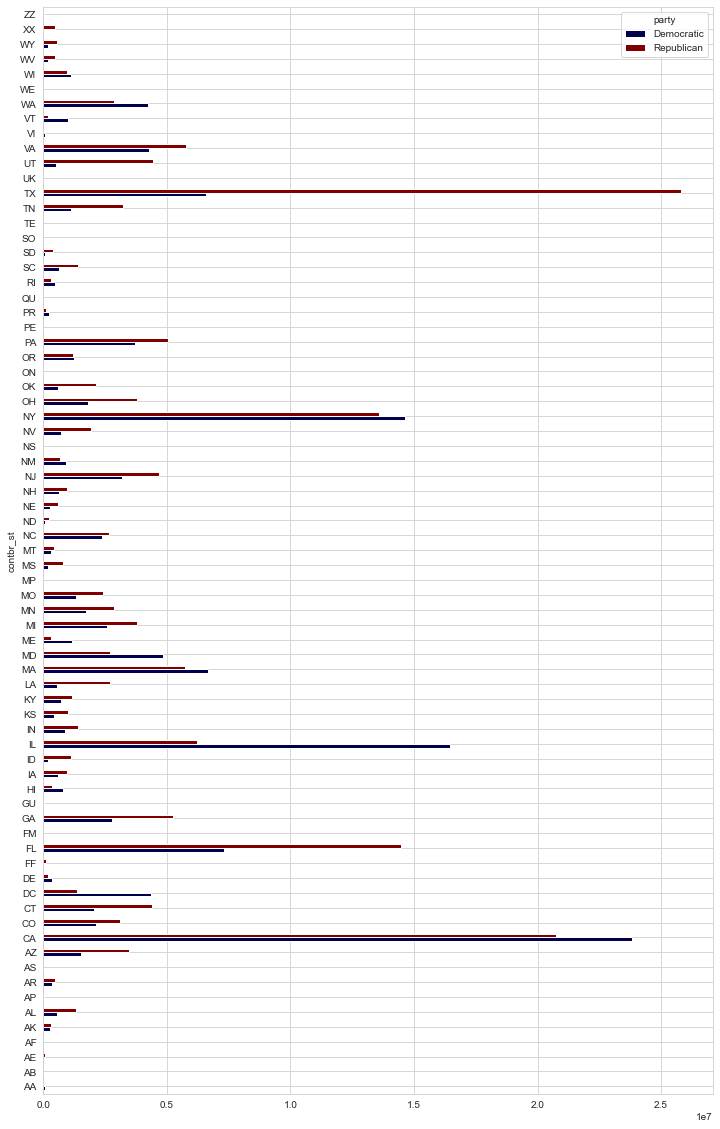

In [39]:
state_df.plot(kind='barh', cmap='seismic', figsize=(12,20))
plt.show()

Interesting enough, the data includes contributions outside of the United State.  Canadian provinces are included as well as Armed Forces overseas.  We can see that Texas is very right leaning, while Illinois is very left.  Also, California and New York, though traditionally have been blue, actually are somewhat contentious.

Another piece of demographic information we have on the donors is their occupations.  We can construct a pivot table the same way we did previously but this time with **contbr_occupation** as the index.

In [40]:
occupation_df = donor_df.pivot_table('contb_receipt_amt',
                     index='contbr_occupation',
                     columns='party',
                     aggfunc='sum')
occupation_df.shape

(45067, 2)

There are a total of 45067 different occupations listed.

In [41]:
occupation_df.head()

party,Democratic,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [42]:
occupation_df.tail()

party,Democratic,Republican
contbr_occupation,,
ZOOKEEPER,35.0,NaN
ZOOLOGIST,400.0,NaN
ZOOLOGY EDUCATION,25.0,NaN
\NONE\,NaN,250.0
~,NaN,75.0


We see that contributions from many occupations are very small.  We can focus on occupations, where the contributions are more than \\$1M.

In [43]:
occupation_df = occupation_df[occupation_df.sum(axis=1) >= 1000000]
occupation_df.shape

(31, 2)

After we retain occupations, where contributions are more than \\$1M, there are now 31 different occupations in the dataframe.  We can construct a horizontal bar chart as before.

<AxesSubplot:ylabel='contbr_occupation'>

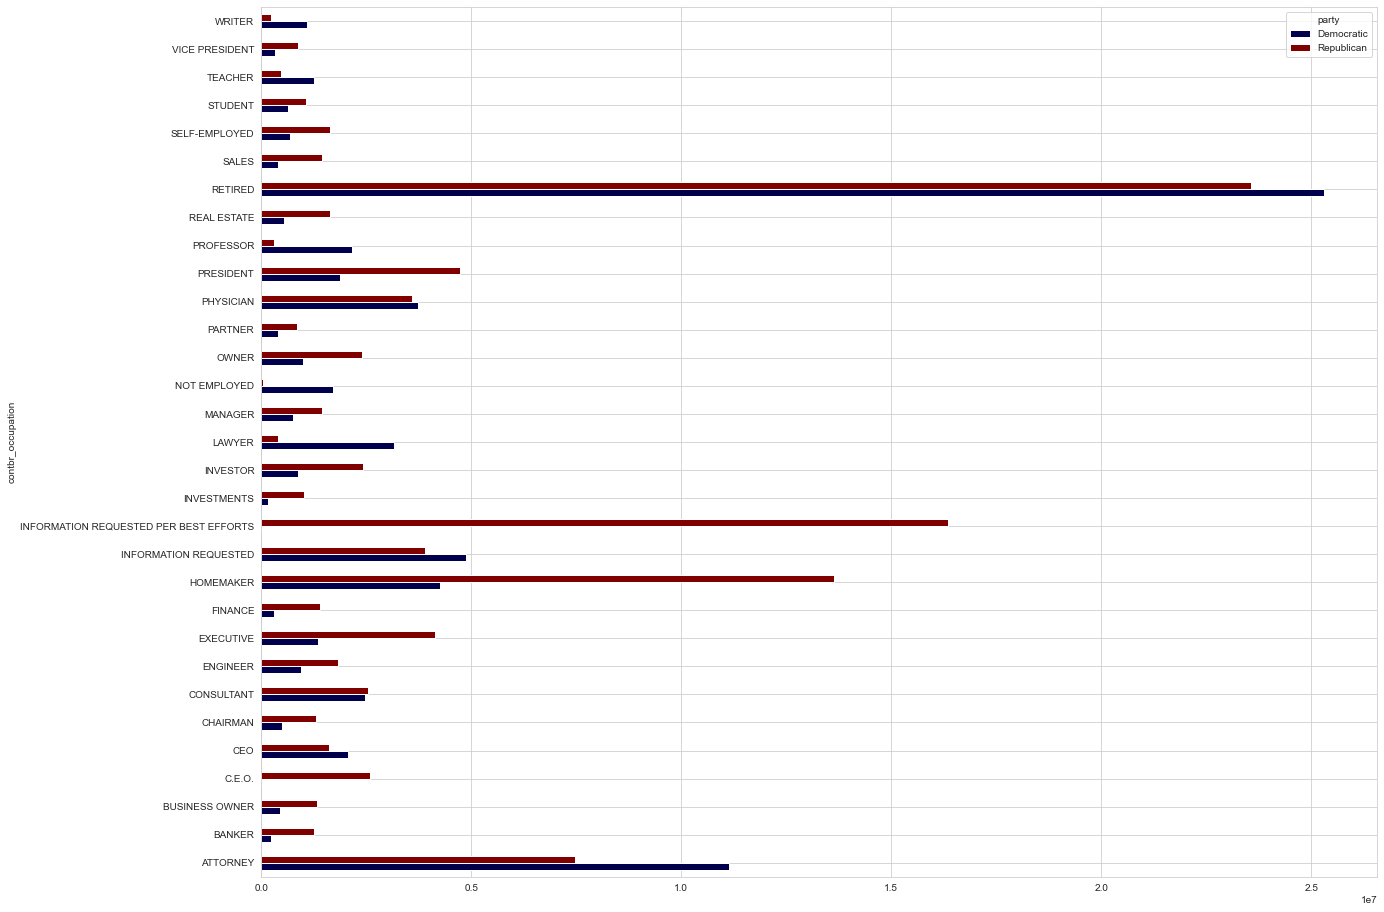

In [44]:
occupation_df.plot(kind='barh', cmap='seismic', figsize=(20,16))

There are two occupations that aren't real occupations, namely **INFORMATION REQUESTED PER BEST EFFORTS** and **INFORMATION REQUESTED**.  Let's remove those.

Also, notice how there is a **CEO** and a **C.E.O.**.  Let's combine them.

In [45]:
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],
                   inplace=True)

In [46]:
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']
occupation_df.drop('C.E.O.', inplace=True)

<AxesSubplot:ylabel='contbr_occupation'>

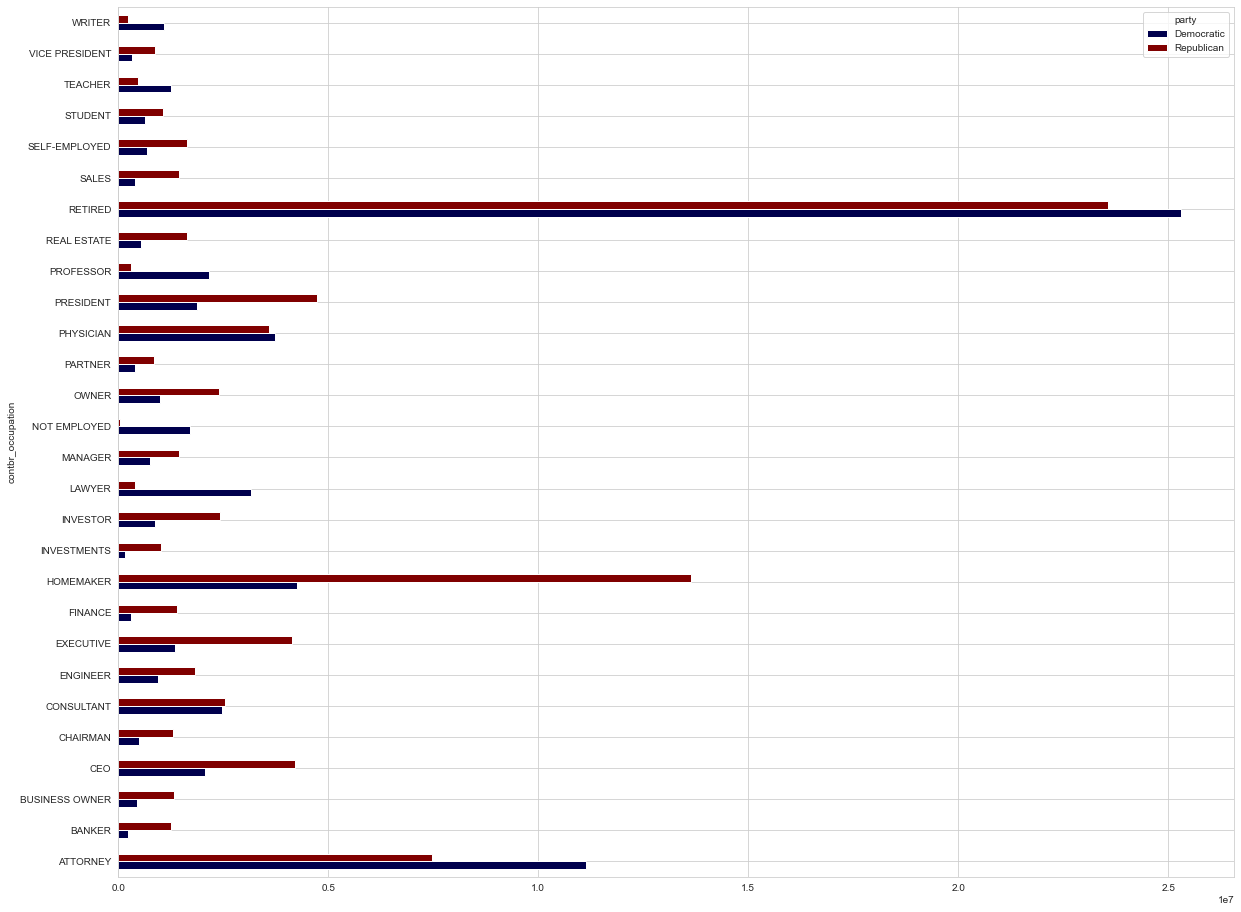

In [47]:
occupation_df.plot(kind='barh', cmap='seismic', figsize=(20,16))

Now we can use this information to help the campaign managers target their effort!